In [15]:
import numpy as np
import statistics
import math

In [16]:
## define node strucutre
class Node:
    def __init__(self,parent,position):
        self.parent = parent
        self.position = position
        self.f = 0
        self.g = 0
        self.h = 0
        
    def __lt__(self,other):
        return self.f <= other.f

        

In [17]:
## create a blank grid
## use a* path to walk the walk --> get path
## check the path, if path is unwalkable, start from the 
## first un-walkable spot, and use a* to find the walk 
def blank_space_a_star(grid,start,end,cost):
    ## turn Nodify start,end point
    start_node = Node(None,start)
    end_node = Node(None,end)
    
    ## create two list --> open_lst, and close_lst 
    ## open_lst: store children nodes 
    ## close_lst: store path node --> path_finder
    open_lst = []
    close_lst = []
    
    open_lst.append(start_node)
    current_node = open_lst[0]
    
    n_row,n_col = np.shape(grid)
    n_row = n_row -1
    n_col = n_col -1
    
    ## put start node into open_lst
    ## loop control, if open lst is not empty
    while len(open_lst)>0:
        
        ## sort open_lst to get the min f val node 
        ## pop that node and set it to current_node
        ## if current_node == end goal, return
            ## else get current_node children
            ## check its children 1. valid? 2. walkable
                ## if yes, append to open_lst 
                ## else, continue
        
        
        open_lst.sort()
#         print("open_lst after sort",[x.position for x in open_lst])
#         print("f value",[x.f for x in open_lst])
        current_node = open_lst.pop(0)
        close_lst.append(current_node)
        if current_node.position == end_node.position:
            return path_finder(current_node,grid,start_node,end_node)
        ## get current_node children
        child_loc = [
            [0,-1], ## moving left
            [0,1],  ## moving right
            [1,0],  ## moving down
            [-1,0] ## moving up
        ]
        
        for child in child_loc:
            ## check if child in open or close lst 
            ## check if child is valid 
            ## check if child is walkale
            ## add node to the open_lst
            mving_child = [current_node.position[0]+child[0],current_node.position[1]+child[1]]
            if mving_child not in [x.position for x in open_lst]:
                if mving_child not in [y.position for y in close_lst]:
                    if 0<=mving_child[0] <= n_row and 0<=mving_child[1] <=n_col:
                        if grid[mving_child[0]][mving_child[1]] != 1:
                            ## create new node
                            mving_node = Node(current_node,mving_child)
                            open_lst.append(mving_node)
        
        
        ## caluclate f,g,h
        ## heuristic: manhattan 
        for children in open_lst:
            children.g = children.g + cost 
            children.h = abs(children.position[0]-end_node.position[0])+ abs(children.position[1]-end_node.position[1])
            children.f = children.g + children.h
            
#         print("close_lst",[x.position for x in close_lst])
#         print("open_lst",[x.position for x in open_lst])
#         print("f value",[x.f for x in open_lst])
#         print("current_node",current_node.position)
#         print("---------------------")
    
    return path_finder(current_node,grid,start_node,end_node)

In [18]:

# blank_route = [[0, 0], [1, 0], [2, 0], [3, 0], [4, 0], [4, 1], [4, 2], [4, 3], [4, 4]]
def repeated_a_star(grid,start,end,cost,blank_route):
    restart_block = []
    for step in blank_route:
        if grid[step[0]][step[1]] == 0:
            restart_block.append(step) 
        else:
            break
    start_node = restart_block.pop(-1)
    repeated_a_result = search(grid,start_node,end,cost)
    return [restart_block] + [repeated_a_result]
            
    

In [19]:
    
    
## define search function 
def search(grid,start,end,cost):
    ## turn Nodify start,end point
    start_node = Node(None,start)
    end_node = Node(None,end)
    
    ## create two list --> open_lst, and close_lst 
    ## open_lst: store children nodes 
    ## close_lst: store path node --> path_finder
    open_lst = []
    close_lst = []
    
    open_lst.append(start_node)
    current_node = open_lst[0]
    
    n_row,n_col = np.shape(grid)
    n_row = n_row -1
    n_col = n_col -1
    
    ## put start node into open_lst
    ## loop control, if open lst is not empty
    while len(open_lst)>0:
        
        ## sort open_lst to get the min f val node 
        ## pop that node and set it to current_node
        ## if current_node == end goal, return
            ## else get current_node children
            ## check its children 1. valid? 2. walkable
                ## if yes, append to open_lst 
                ## else, continue
        
        
        open_lst.sort()
#         print("open_lst after sort",[x.position for x in open_lst])
#         print("f value",[x.f for x in open_lst])
        current_node = open_lst.pop(0)
        close_lst.append(current_node)
        if current_node.position == end_node.position:
            return path_finder(current_node,grid,start_node,end_node)
        ## get current_node children
        child_loc = [
            [0,-1], ## moving left
            [0,1],  ## moving right
            [1,0],  ## moving down
            [-1,0] ## moving up
        ]
        
        for child in child_loc:
            ## check if child in open or close lst 
            ## check if child is valid 
            ## check if child is walkale
            ## add node to the open_lst
            mving_child = [current_node.position[0]+child[0],current_node.position[1]+child[1]]
            if mving_child not in [x.position for x in open_lst]:
                if mving_child not in [y.position for y in close_lst]:
                    if 0<=mving_child[0] <= n_row and 0<=mving_child[1] <=n_col:
                        if grid[mving_child[0]][mving_child[1]] != 1:
                            ## create new node
                            mving_node = Node(current_node,mving_child)
                            open_lst.append(mving_node)
        
        
        for children in open_lst:
            children.g = children.g + cost 
            children.h = math.sqrt(pow(children.position[0]-end_node.position[0],2)+ pow(children.position[1]-end_node.position[1],2))
            children.f = children.g + children.h
            
#         print("close_lst",[x.position for x in close_lst])
#         print("open_lst",[x.position for x in open_lst])
#         print("f value",[x.f for x in open_lst])
#         print("current_node",current_node.position)
#         print("---------------------")
    
    return path_finder(current_node,grid,start_node,end_node)
        

In [20]:
def path_finder(current_node,grid,start_node,end_node):
    path = []
    
    current = current_node
    
    while current:
        
        path.append(current.position)
        
        current = current.parent
        
    path = path[::-1]
    
    if path[0] == start_node.position and path[-1] == end_node.position:
        return path
    else:
        return "Path is not found"

In [21]:
import random

## maze function --> 101 x 101 
## '0' walkable
## '1' block
def create_maze(nx,ny,p_val):
    ##empty maze, all values are 0
    maze = [[0 for j in range(nx)]for i in range(ny)]
    
    ## loop each cell, calculate p value, resign val
    for i in range(nx):
        for j in range(ny):
            prob_test_for_each_blck = random.uniform(0, 1)
            if prob_test_for_each_blck <= p_val:
                maze[i][j] = 1 
    maze[0][0] = 0
    maze[100][100] = 0
    return maze


In [50]:
## p0 = 0.4

def avg_traj(nx,ny,p_val):
    return_result = []
    pass_lst = []
    avg_solv = []
    for x in range(5):
        grid = create_maze(nx,ny,p_val)
        start = [0,0]
        end = [100,100]
        maze = [[0 for j in range(nx)]for i in range(ny)]
        blank_route = blank_space_a_star(maze,start,end,cost)
        repeated_result = repeated_a_star(grid,start,end,cost,blank_route)
        if repeated_result[-1] != 'Path is not found':
            pass_lst.append(int(len(repeated_result[0]) + len(repeated_result[-1])))
#         else:
#             pass_lst.append(0)
#     print(pass_lst)
    solv_result = statistics.mean(pass_lst)
    return [p_val,solv_result]


In [116]:
def shortest_final_grid(nx,ny,p_val):
    return_result = []
    avg_solv = []
    solv_result = []
    pass_lst = []
    for x in range(5):
#         for y in range(5):
        grid = create_maze(nx,ny,p_val)
        start = [0,0]
        end = [100,100]
        maze = [[0 for j in range(nx)]for i in range(ny)]
        blank_route = blank_space_a_star(maze,start,end,cost)
        repeated_result = repeated_a_star(grid,start,end,cost,blank_route)
        if repeated_result[-1] != 'Path is not found':
#             print('repeated_result',repeated_result)
            pass_lst.append(int(len(repeated_result[0]) + len(repeated_result[-1])))
        else:
            continue 
    print("pass_lst before calculation",pass_lst)                
    solv_result.append(sum(pass_lst)/min(pass_lst))
#     print("pass_lst",pass_lst)
#     print("solve_result",solv_result)
    
    return [p_val,solv_result]


In [157]:
def shortest_final_grid_wth_shortest_full_grid(nx,ny,p_val):
    return_result = []
    avg_solv = []
    solv_result = []
    pass_lst = []
    full_grid = []
    for x in range(5):
#         for y in range(5):
        grid = create_maze(nx,ny,p_val)
        start = [0,0]
        end = [100,100]
        maze = [[0 for j in range(nx)]for i in range(ny)]
        blank_route = blank_space_a_star(maze,start,end,cost)
        repeated_result = repeated_a_star(grid,start,end,cost,blank_route)
        a_star = search(grid,start,end,cost)
        if repeated_result[-1] != 'Path is not found':
#             print('repeated_result',repeated_result)
            pass_lst.append(int(len(repeated_result[0]) + len(repeated_result[-1])))
            full_grid.append(int(len(a_star)))
        else:
            continue 
        print
    print("pass_lst before calculation",pass_lst)  
    if pass_lst:
        solv_result.append(min(pass_lst)/min(full_grid))
    return [p_val,solv_result]

In [158]:
def avg_cells(nx,ny,p_val):
    return_result = []
    avg_solv = []
    solv_result = []
    pass_lst = []
    full_grid = []
    for x in range(5):
#         for y in range(5):
        grid = create_maze(nx,ny,p_val)
        start = [0,0]
        end = [100,100]
        maze = [[0 for j in range(nx)]for i in range(ny)]
        blank_route = blank_space_a_star(maze,start,end,cost)
        repeated_result = repeated_a_star(grid,start,end,cost,blank_route)
        a_star = search(grid,start,end,cost)
        if repeated_result[-1] != 'Path is not found':
#             print('repeated_result',repeated_result)
            pass_lst.append(int(len(repeated_result[0]) + len(repeated_result[-1])))
        else:
            continue 
        print
    print("pass_lst before calculation",pass_lst)                
    solv_result.append(np.mean(pass_lst))
#     print("pass_lst",pass_lst)
#     print("solve_result",solv_result)
    
    return [p_val,solv_result]

In [159]:
# Average Trajectory Length
# avg repeated A*


#Length of Shortest Path in Final Discovered Gridworld
# repeated A* 最短的一条

#Length of Shortest Path in Full Gridworld
# 普通A*

# – Density vs Average (Length of Trajectory / Length of Shortest Path in Final Discovered Gridworld)
# – Density vs Average (Length of Shortest Path in Final Discovered Gridworld / Length of Shortest Path in Full Gridworld)
# – Density vs Average Number of Cells Processed by Repeated A*

In [163]:
if __name__ == "__main__":
    cost = 1
    result_lst = []
    result_lst_sfd = []
    result_lst_test =[]
    result_fdg_fg =[]
    result_avg_cells = []
    nx,ny = 101,101
    for x in np.arange(0,0.33,0.05):
        p_val = float("{0:.2f}".format(x))
        result_lst.append(avg_traj(nx,ny,p_val))
        result_lst_sfd.append(shortest_final_grid(nx,ny,p_val))
        result_fdg_fg.append(shortest_final_grid_wth_shortest_full_grid(nx,ny,p_val))
        result_avg_cells.append(avg_cells(nx,ny,p_val))
    
#     print(result_lst)


pass_lst before calculation [201, 201, 201, 201, 201]
pass_lst before calculation [201, 201, 201, 201, 201]
pass_lst before calculation [201, 201, 201, 201, 201]
pass_lst before calculation [201, 201, 201, 201, 201]
pass_lst before calculation [201, 201, 205, 201, 201]
pass_lst before calculation [201, 203, 201, 201, 201]
pass_lst before calculation [201, 201, 201, 201, 203]
pass_lst before calculation [201, 205, 201, 203]
pass_lst before calculation [201, 201, 201, 201, 203]
pass_lst before calculation [203, 201, 201, 203, 205]
pass_lst before calculation [215, 207, 217, 205, 207]
pass_lst before calculation [201, 201, 201, 205, 201]
pass_lst before calculation [215, 205, 221, 203, 215]
pass_lst before calculation [219, 211, 231, 209, 223]
pass_lst before calculation [215, 211, 229]
pass_lst before calculation [221, 213, 269]
pass_lst before calculation [251, 217, 211, 223]
pass_lst before calculation [219, 245, 245, 235]
pass_lst before calculation [245]
pass_lst before calculation [

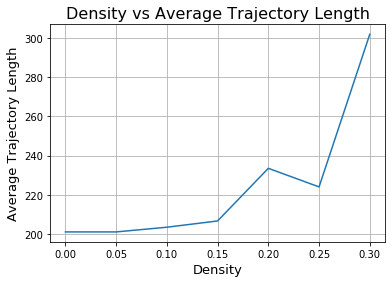

In [164]:
import matplotlib.pyplot as plt
%matplotlib inline

x = [x[0] for x in result_lst]
y = [y[1] for y in result_lst]

fig, ax = plt.subplots()
ax.set_title("Density vs Average Trajectory Length", fontsize='16')
ax.plot(x, y)
# plt.set_title('Run Time Between Three Functions')
ax.xaxis.set_label_text("Density",fontsize='13')
ax.yaxis.set_label_text("Average Trajectory Length",fontsize='13')
plt.grid()
plt.show()

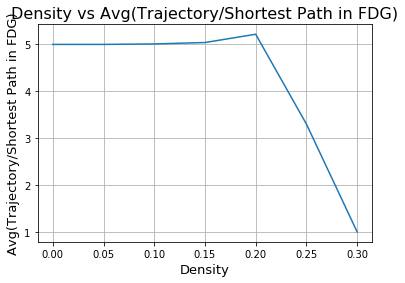

In [165]:
import matplotlib.pyplot as plt
%matplotlib inline

x = [x[0] for x in result_lst_sfd]
y = [y[1] for y in result_lst_sfd]

fig, ax = plt.subplots()
ax.set_title("Density vs Avg(Trajectory/Shortest Path in FDG)", fontsize='16')
ax.plot(x, y)
# plt.set_title('Run Time Between Three Functions')
ax.xaxis.set_label_text("Density",fontsize='13')
ax.yaxis.set_label_text("Avg(Trajectory/Shortest Path in FDG)",fontsize='13')
plt.grid()
plt.show()

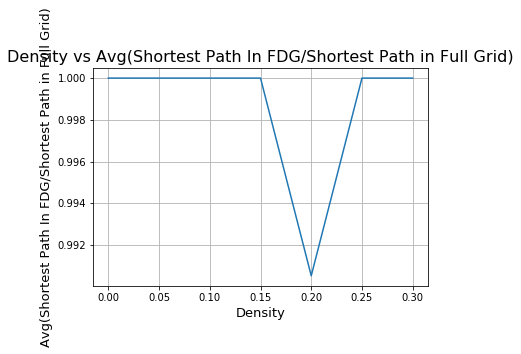

In [166]:
import matplotlib.pyplot as plt
%matplotlib inline

x = [x[0] for x in result_fdg_fg]
y = [y[1] for y in result_fdg_fg]

fig, ax = plt.subplots()
ax.set_title("Density vs Avg(Shortest Path In FDG/Shortest Path in Full Grid)", fontsize='16')
ax.plot(x, y)
# plt.set_title('Run Time Between Three Functions')
ax.xaxis.set_label_text("Density",fontsize='13')
ax.yaxis.set_label_text("Avg(Shortest Path In FDG/Shortest Path in Full Grid)",fontsize='13')
plt.grid()
plt.show()

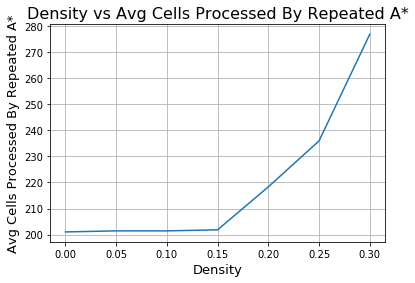

In [167]:
import matplotlib.pyplot as plt
%matplotlib inline

x = [x[0] for x in result_avg_cells]
y = [y[1] for y in result_avg_cells]

fig, ax = plt.subplots()
ax.set_title("Density vs Avg Cells Processed By Repeated A*", fontsize='16')
ax.plot(x, y)
# plt.set_title('Run Time Between Three Functions')
ax.xaxis.set_label_text("Density",fontsize='13')
ax.yaxis.set_label_text("Avg Cells Processed By Repeated A*",fontsize='13')
plt.grid()
plt.show()